In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython.display import display, clear_output

## Definición de variables iniciales

In [2]:
colores = ['Negro', 'Blanco', 'Gris']
gramajes = [80, 120, 150]
costo_cambio_color = {'NegroBlanco': 500, 'NegroGris': 450,
                       'GrisBlanco': 300, 'GrisNegro': 400,
                       'BlancoGris': 250, 'BlancoNegro': 200,
                    }

# Producción posible de acuerdo con el gramaje seleccionado (toneladas / hora). Se supone que se produce la capacidad máxima de papel de dicho tipo al finalizar el día
# al multiplicar las toneladas por el gramaje / hora.
produccion_gramaje_hora = [1, 0.9, 0.8]

# Costo de producción de papel de cada color (por tonelada)
costo_produccion_tonelada = [50, 30, 40]

# Precio de venta de papel de cada color (por tonelada)
precio_color = [95, 60, 75]

# Precio de venta de papel de cada gramaje (por tonelada)
precio_gramaje= [1.2, 1.5, 1.8]

# Pedido por color y gramaje. Ejemplo: Negro 80, Negro 120, Negro 150, Blanco 80, Blanco 120, Blanco 150, Gris 80, Gris 120, Gris 150
pedido_clientes = [250, 250, 250, 250, 250, 250, 250, 250, 250]  

In [3]:
def variables_iniciales(colores_disponibles, gramajes_disponibles, costo_limpieza):

    print("---FÁBRICA DE PRODUCCIÓN DE PAPEL---")
    print("\n Colores disponibles de papel")
    for color in colores_disponibles: print('-----', color)

    print("\n Gramajes disponibles de papel")
    for gramaje in gramajes_disponibles: print('-----', gramaje, 'g/m2')

    print("\n Costos de cambio de color en producción: ")
    for limpieza in costo_limpieza: print('-----', limpieza,': $', costo_limpieza[limpieza])

    try:
        dias_produccion = input('Ingrese el periodo de producción (de 10 a 50 días): ')
        dias_produccion = int(float((dias_produccion)))

        if not (10 <= dias_produccion <= 50):
            raise ValueError(f"Los días de producción están fuera del rango permitido (10-50 días)")
        
        produccion_diaria = input('Ingrese la cantidad máxima de producción de papel (en toneladas) por día: ')
        produccion_diaria = float((produccion_diaria))

        if not (10 <= produccion_diaria <= 50):
            raise ValueError(f"La producción de toneladas de papel diarias, están fuera del rango permitido por la máquina (10-50 toneladas)")

        minimos_colores = []
        for color in colores_disponibles:
            for gramaje in gramajes_disponibles:
                minimo_color = input(f'Ingrese el porcentaje mínimo de producción esperado en {int(produccion_diaria/2)} días para papel {color} {gramaje} g/m2:')
                minimo_color = float((minimo_color))
                minimos_colores.append(minimo_color)

        print(f"\nDías de producción: {dias_produccion} días \nCapacidad de producción diaria: {produccion_diaria} Tons", 
             f"\nProcentaje acumulado de producción esperado a la mitad del periodo: ")
        
        i = 0
        for color in colores_disponibles:
            for gramaje in gramajes_disponibles:
                print(f'{color} {gramaje} : {minimos_colores[i]}%')
                i+=1
        
        return [dias_produccion, produccion_diaria, minimos_colores]
    
    except ValueError as e:
        print(f"Error {e}: \nLas entradas no son un valor válido. Reintente por favor.")
        return None

In [4]:
valores_iniciales  = variables_iniciales(colores, gramajes, costo_cambio_color)

---FÁBRICA DE PRODUCCIÓN DE PAPEL---

 Colores disponibles de papel
----- Negro
----- Blanco
----- Gris

 Gramajes disponibles de papel
----- 80 g/m2
----- 120 g/m2
----- 150 g/m2

 Costos de cambio de color en producción: 
----- NegroBlanco : $ 500
----- NegroGris : $ 450
----- GrisBlanco : $ 300
----- GrisNegro : $ 400
----- BlancoGris : $ 250
----- BlancoNegro : $ 200

Días de producción: 50 días 
Capacidad de producción diaria: 50.0 Tons 
Procentaje acumulado de producción esperado a la mitad del periodo: 
Negro 80 : 35.0%
Negro 120 : 40.0%
Negro 150 : 50.0%
Blanco 80 : 45.0%
Blanco 120 : 20.0%
Blanco 150 : 35.0%
Gris 80 : 40.0%
Gris 120 : 45.0%
Gris 150 : 50.0%


### **Generación de población inicial**

In [5]:
def generar_poblacion(colores_disp, gramajes_disp, dias_prod, cap_prod_diaria, produccion_gramaje, cant_pobladores):
    """
    Función que genera la población inicial para la resolución del problema de la fábrica de papel.
    Toma como argumentos:
    Colores disponibles, gramajes disponibles, días de producción y capacidad de producción diaria
    También necesita la cantidad de pobladores a generar
    """
    poblacion_final = []
    for i in range(cant_pobladores):
        poblador = np.zeros( (3,dias_prod) )
        for dia in range(dias_prod):
            # Se generan numeros aleatorios entre 0 y la capacidad de produccion diaria. No se puede producir en total, más del límite diario por la limitación de la máquina, ni es conveniente cambiar de tipo de papel por dia, de acuerdo con las especificaciones.
            #toneladas = random.randint(1, int(cap_prod_diaria))
            # Se generan gramajes aleatorios de los disponibles (se codifican como 0 = 80g/m2, 1 = 120g/m2 y 2 = 180g/m2 )
            gramaje = random.sample(list(range(0, len(gramajes_disp))), 1)[0]
            # Se generan colores aleatorios de los disponibles (se codifican como 0 = Negro, 1 = Blanco y 2 = Gris )
            color = random.sample(list(range(0, len(colores_disp))), 1)[0]
            # La producción de cierto tipo de papel está limitada por el gramaje, volviendo más lenta la producción posible al día
            toneladas = cap_prod_diaria * produccion_gramaje[gramaje]
            # La primera fila de la matriz serán las toneladas diarias producidas
            poblador[ 0 , dia] = toneladas
            # La segunda fila de la matriz corresponde al gramaje seleccionado
            poblador[ 1 , dia] = gramaje
            # La tercera fila de la matriz corresponde al color de papel producido dicho día
            poblador[ 2 , dia] = color
        poblacion_final.append(poblador) 
    return poblacion_final

## Detección de cambios de colores en un poblador

In [6]:
def detectar_cambios_colores(vector_colores, costo_por_cambio_color, colores_disp):
    costo = 0
    for i in range(len(vector_colores)-1):
        if (vector_colores[i] != vector_colores[i+1]):
            costo += costo_por_cambio_color[ colores_disp[ int(vector_colores[i]) ] + colores_disp[ int(vector_colores[i+1]) ] ]
    return costo

## Cálculo de la aptitud

In [7]:
def funcion_aptitud(poblacion, precio_venta_color, precio_venta_gramaje, costo_produccion_tonelada_color, colores_disponibles, costo_por_cambio_color, porcentaje_esperado_periodo, pedido_clientes_periodo):
    """ Función que calcula la aptitud. La aptitud es la maximización de la utilidad, es decir:
    Aptitud = ingresos - costos
    Ingresos = Precio de venta de tonelada de color x precio de venta de tonelada de gramaje x toneladas producidas
    Costos = costo de cambios de color  + ( costo de producción de color * toneladas producidas )
    """ 
    ingresos_poblacion = []
    costos_poblacion_color = []
    costos_poblacion_cambio_color = []
    multas_stock_poblador = []
    produccion_final = []
    produccion_periodo_requerida = []

    cantidad_dias = len(poblacion[0][0])  
    # Recorre todos los pobladores
    for poblador in poblacion:

        ingresos = 0
        costos_produccion_color = 0
        costos_produccion_cambio_color = 0
        multas = 0

        produccion_final_por_poblador = []
        produccion_periodo_por_poblador = []
        toneladas_papel_finales = []
        produccion_periodo = []
        
        # Producción esperada a la mitad del periodo
        produccion_esperada_periodo = ( np.array(porcentaje_esperado_periodo) / 100 ) * np.array(pedido_clientes_periodo)

        for i in range(len(colores_disponibles) * len(gramajes)):
            #Mascara para aislar los tipos de papel producidos en la mitad del periodo, y contabilizar toneladas producidas
            mascara = ( poblador[1,:cantidad_dias // 2]*3 + poblador[2,:cantidad_dias // 2] ) == i
            #Mascara para aislar los tipos de papel producidos en todo el periodo de producción, y contabilizar toneladas totales producidas, ingresos, costos y multas
            mascara2 = ( poblador[1,:]*3 + poblador[2,:] ) == i
            #Producciones a la mitad del periodo y al final
            produccion_periodo.append( np.sum(poblador[0,:cantidad_dias // 2][mascara]) )
            toneladas_papel_finales.append( np.sum(poblador[0][mascara2] ) )
            #Recuperación de índices para acceder a costos asociados
            indice_color = (i) % len(colores_disponibles) 
            indice_gramaje = (i) // len(gramajes) 
            #Recuperación de color y gramaje decodificado, para interpretación
            color = colores_disponibles[ indice_color ]
            gramaje = gramajes[indice_gramaje ]
            # Cálculo de penalización por no entregar pedidos
            no_entregados = max(0, int( (toneladas_papel_finales[i] - produccion_periodo[i]) > 0 ) )
            # Cálculo de multas por pedidos finales muy grandes o no alcanzar metas en el periodo especificado
            multa_exceso_stock = max(0, toneladas_papel_finales[i] - pedido_clientes_periodo[i] )**2
            multa_stock_bajo = max(0, produccion_esperada_periodo[i] -  produccion_periodo[i] )**3
            # Cálculo de ingresos (toneladas de cada tipo producidas * precio de venta por color * precio de venta por gramaje)
            ingresos += (toneladas_papel_finales[i] * precio_venta_color[indice_color] * precio_venta_gramaje[indice_gramaje]) * no_entregados
            multas +=  ( multa_exceso_stock + multa_stock_bajo ) 
            # Cálculo de costos (toneladas de cada tipo producidas * costo de producción de dicho color)
            costos_produccion_color += (toneladas_papel_finales[i] * (costo_produccion_tonelada_color[indice_color]))
            # Se guarda decodificación de producción a la mitad del periodo y al final del periodo para interpretación
            produccion_final_por_poblador.append((f"Papel {color} {gramaje} : " + str( toneladas_papel_finales[i] ) ) )
            produccion_periodo_por_poblador.append((f"Papel {color} {gramaje} : " + str( produccion_periodo[i] ) ) )

        #Para la comparativa de un día con el siguiente, y determinar los costos asociados al cambio de color (limpieza de máquina)
        costos_produccion_cambio_color = detectar_cambios_colores(poblador[2],costo_por_cambio_color,colores_disponibles)*len(toneladas_papel_finales)

        # Para cada poblador, se guardan estos valores
        produccion_final.append(produccion_final_por_poblador)
        produccion_periodo_requerida.append(produccion_periodo_por_poblador)
        ingresos_poblacion.append(ingresos)
        costos_poblacion_color.append(costos_produccion_color)
        costos_poblacion_cambio_color.append(costos_produccion_cambio_color)
        multas_stock_poblador.append( (multas))
    # Cálculo de la aptitud
    aptitud = np.array(ingresos_poblacion)- np.array(costos_poblacion_color) - np.array(costos_poblacion_cambio_color) - np.array(multas_stock_poblador)
    # Creación de la matriz de aptitud donde se encuentra la aptitud y el detalle de producción (numéricamente) a lo largo de los días
    matriz_con_aptitud = pd.DataFrame()
    matriz_con_aptitud["APTITUD"] = aptitud
    matriz_con_aptitud["POBLACION"] = [poblacion[i] for i in range(len(poblacion))]
    matriz_con_aptitud["PRODUCCION FINAL"] = produccion_final
    matriz_con_aptitud["PRODUCCION EN PERIODO"] = produccion_periodo_requerida

    return matriz_con_aptitud  

## Métodos de cruza

In [8]:
def cruza_un_corte(padre1, padre2):

    num_genes = len(padre1[0])

    hijo_1 = np.zeros( (len(padre1), num_genes) )
    hijo_2 = np.zeros( (len(padre2), num_genes) )

    hijo_1 =  np.hstack( [padre1[:,:int(num_genes/2)] , padre2[:,int(num_genes/2):num_genes] ] )
    hijo_2 =  np.hstack( [padre2[:,:int(num_genes/2)] , padre1[:,int(num_genes/2):num_genes] ] )
    
    return hijo_1, hijo_2

In [9]:
def cruza_homogenea(padre1, padre2):

    num_genes = len(padre1[0])

    hijo_1 = np.zeros( (len(padre1), num_genes) )
    hijo_2 = np.zeros( (len(padre2), num_genes) )

    for i in range(num_genes):

        gen_padre = random.randint(0, 1)

        if (gen_padre == 0):
            hijo_1[:,i] = padre1[:,i]
            hijo_2[:,i] = padre2[:,i]
        else:
            hijo_1[:,i] = padre2[:,i]
            hijo_2[:,i] = padre1[:,i]

    return hijo_1, hijo_2

## Métodos de selección

In [10]:
def tournament(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    i = 0
    poblacion_hij = []
    while ( i < (n/2) ):
        #Hijos generados (forzosamente con población previamente ordenada), se cruzan padres 1-10, 2-9, 3-8, y así sucesivamente
        #hijo_1, hijo_2 = cruza_un_corte(poblacion[i], poblacion[n-1-i]) #CRUZA UN CORTE
        hijo_1, hijo_2 = cruza_homogenea(poblacion[i], poblacion[n-1-i]) #CRUZA HOMOGÉNEA
        poblacion_hij.append(hijo_1)
        poblacion_hij.append(hijo_2)
        i+=1
    return poblacion_hij

In [11]:
def aleatorio_monogamico(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    i = 0
    poblacion_disponible = poblacion.to_list().copy()
    poblacion_hijos = []
    
    while ( i < (n/2) ):
        #Hijos generados (dos posibles, por cada pareja de padres seleccionados, cada pareja es seleccionada aleatoriamente una sola vez)
        if(len(poblacion_disponible)>2):
            pareja_indices = random.sample(range(len(poblacion_disponible)), 2)
            pareja = [poblacion_disponible[pareja_indices[0]], poblacion_disponible[pareja_indices[1]]]
            
            #hijo_1, hijo_2 = cruza_un_corte(pareja[0], pareja[1]) #CRUZA UN CORTE
            hijo_1, hijo_2 = cruza_homogenea(pareja[0], pareja[1]) # CRUZA HOMOGÉNEA
            poblacion_hijos.append(hijo_1)
            poblacion_hijos.append(hijo_2)

            poblacion_disponible = [x for j, x in enumerate(poblacion_disponible) if j not in pareja_indices]
        
            i+=1
        else:
            break
    return poblacion_hijos

## Mutación por inversión simple

In [12]:
def mutacion_inversion_simple(poblac, porc_mut):
    # Porc_mut = porcentaje de individuos hijos a mutar (en decimal)
    # poblacion_hijos = poblacion total de hijos en una generación dada
    
    i = random.randint(-8,8)

    cant_hijos_mutados = int(len(poblac) * porc_mut)
    hijos_a_mutar = poblac[ len(poblac) - cant_hijos_mutados: ]
    indice = int(np.round(len(hijos_a_mutar[0][0])/4))
    mutados = np.zeros_like(hijos_a_mutar)
    
    for j, individuo in enumerate(hijos_a_mutar):
        subcadena = individuo[ : , indice+i : (2*indice)+i ]

        cromosoma = np.concatenate( (individuo[ : , :indice+i ] , individuo[ : , (2*indice)+i : ]), axis = 1)
        subcadena_invertida = subcadena[:, ::-1]
    
        mutados[j] = np.concatenate( (cromosoma[:, :indice+i], subcadena_invertida, cromosoma[:, indice+i:]), axis = 1)
    poblac[len(poblac) - cant_hijos_mutados: ] = mutados

## Funciones para graficar progreso de poblaciones

In [13]:
def grafica_multiislas(i_graph, aptitudes, generaciones):
    plt.figure(figsize=(12, 4))
    for idx, aptitud in enumerate(aptitudes):
        #plt.plot(i_graph, aptitud["media"], label=f"Isla {idx+1} - Media")
        plt.plot(i_graph, aptitud["max"], label=f"Isla {idx+1} - Mejor Aptitud : {aptitud['max'][-1]}", linestyle="-")
        #plt.plot(i_graph, aptitud["min"], label=f"Isla {idx+1} - Peor Aptitud", linestyle=":")
    
    plt.xlim([-1, generaciones+1 ] )
    plt.ylim([0, aptitud['max'][-1] * 1.2])
    plt.grid()
    plt.xlabel("Generaciones",  weight ="bold")
    plt.ylabel("Aptitud", weight ="bold")
    plt.title(f"Evolución de la Aptitud en Multiislas, generacion {i_graph[-1]}", weight ="bold")
    plt.legend()
    clear_output(wait=True)
    plt.show()

In [14]:
def grafica_poblacion(x,y, y2,y3, i, generaciones):
    
    plt.figure(figsize=(12, 4))
    plt.plot( x, y, '-', color = "red", label = "Aptitud promedio")
    plt.plot( x, y2, '-', color = "green", label = "Mejor Aptitud")
    plt.plot( x, y3, '-', color = "purple", label = "Peor Aptitud")
    plt.ylim([0, y2[-1] * 1.2])
    plt.xlim([-1, generaciones+1 ] )
    plt.grid()
    leyenda = 'Aptitudes: Promedio = {:.2f}, Máxima = {:.2f}, Mínima =  {:.2f}, Generación {:d}'.format(y[-1], y2[-1], y3[-1], i)
    plt.title(leyenda, weight ="bold");
    plt.xlabel('Generaciones', weight ="bold");
    plt.ylabel('Utilidades (Aptitud)',  weight ="bold");
    plt.legend()
    clear_output(wait=True)
    plt.show()

## Algoritmo genético simple

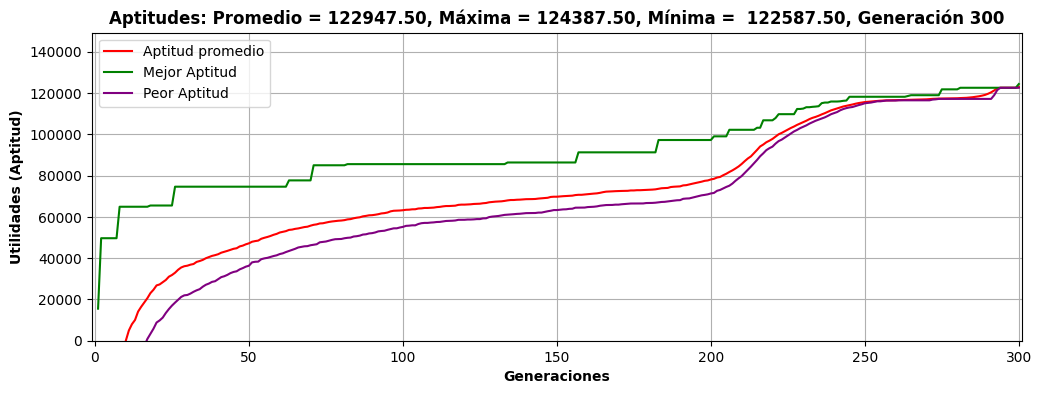

In [15]:
poblacion = generar_poblacion(colores, gramajes, valores_iniciales[0], valores_iniciales[1], produccion_gramaje_hora, 200)
matriz_con_aptitud = funcion_aptitud(poblacion, precio_color, precio_gramaje, costo_produccion_tonelada, colores, costo_cambio_color, valores_iniciales[2], pedido_clientes)

matriz_con_aptitud = matriz_con_aptitud.sort_values(by="APTITUD", ascending = False).reset_index(drop=True)
generaciones = 300
apt_max = []
apt_min = []
apt_media = []
i_graph = []

for i in range(1,generaciones+1):
    
    poblacion_hijos = tournament(matriz_con_aptitud["POBLACION"])
    #poblacion_hijos = aleatorio_monogamico(matriz_con_aptitud["POBLACION"])
    mutacion_inversion_simple(poblacion_hijos, 0.2)
    matriz_con_aptitud_hijos = funcion_aptitud(poblacion_hijos, precio_color, precio_gramaje, costo_produccion_tonelada, colores, costo_cambio_color, valores_iniciales[2], pedido_clientes)
    

    matriz_mixed = pd.concat([matriz_con_aptitud, matriz_con_aptitud_hijos], ignore_index=True)
    matriz_final = matriz_mixed.sort_values(by="APTITUD", ascending = False).reset_index(drop=True)

    matriz_con_aptitud = matriz_final[0:int(len(matriz_final)/2)]

    a2 = (matriz_con_aptitud["APTITUD"].mean())
    a3 = (matriz_con_aptitud["APTITUD"][0])
    a4 = matriz_con_aptitud["APTITUD"][len(matriz_con_aptitud)-1]

    i_graph.append(i)
    apt_max.append(a3)
    apt_min.append(a4)
    apt_media.append(a2)

    if( i > 10  and ( ( np.mean(apt_max[-10:]) == np.mean(apt_min[-10:]) ))): 
                break

    grafica_poblacion(i_graph,apt_media,apt_max,apt_min, i, generaciones)

In [16]:
poblacion[0]

array([[50., 50., 50., 40., 45., 40., 40., 50., 50., 45., 40., 50., 50.,
        40., 50., 45., 50., 40., 50., 45., 40., 45., 45., 45., 40., 40.,
        45., 40., 45., 50., 50., 45., 40., 50., 40., 45., 45., 40., 50.,
        45., 50., 40., 40., 50., 50., 40., 45., 45., 45., 40.],
       [ 0.,  0.,  0.,  2.,  1.,  2.,  2.,  0.,  0.,  1.,  2.,  0.,  0.,
         2.,  0.,  1.,  0.,  2.,  0.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,
         1.,  2.,  1.,  0.,  0.,  1.,  2.,  0.,  2.,  1.,  1.,  2.,  0.,
         1.,  0.,  2.,  2.,  0.,  0.,  2.,  1.,  1.,  1.,  2.],
       [ 2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  0.,  0.,
         0.,  2.,  2.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  2.,
         2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  0.,  1.,  0.]])

In [17]:
matriz_con_aptitud['POBLACION'][0]

array([[45., 50., 40., 40., 50., 45., 50., 45., 45., 45., 40., 50., 40.,
        45., 45., 40., 40., 40., 40., 50., 40., 50., 40., 40., 50., 45.,
        45., 45., 50., 45., 40., 40., 50., 45., 40., 50., 40., 40., 50.,
        45., 45., 50., 40., 40., 45., 40., 40., 45., 50., 45.],
       [ 1.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  2.,
         1.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,  0.,  2.,  2.,  0.,  1.,
         1.,  1.,  0.,  1.,  2.,  2.,  0.,  1.,  2.,  0.,  2.,  2.,  0.,
         1.,  1.,  0.,  2.,  2.,  1.,  2.,  2.,  1.,  0.,  1.],
       [ 2.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.]])

In [18]:
print("Pedido final: ", np.array(pedido_clientes) )
matriz_con_aptitud['PRODUCCION FINAL'][0]

Pedido final:  [250 250 250 250 250 250 250 250 250]


['Papel Negro 80 : 250.0',
 'Papel Blanco 80 : 200.0',
 'Papel Gris 80 : 200.0',
 'Papel Negro 120 : 270.0',
 'Papel Blanco 120 : 270.0',
 'Papel Gris 120 : 225.0',
 'Papel Negro 150 : 280.0',
 'Papel Blanco 150 : 240.0',
 'Papel Gris 150 : 280.0']

In [19]:
print("Pedido en periodo: ", np.array(pedido_clientes) * np.array(valores_iniciales[2] )/ 100 )
matriz_con_aptitud['PRODUCCION EN PERIODO'][0]

Pedido en periodo:  [ 87.5 100.  125.  112.5  50.   87.5 100.  112.5 125. ]


['Papel Negro 80 : 100.0',
 'Papel Blanco 80 : 100.0',
 'Papel Gris 80 : 150.0',
 'Papel Negro 120 : 135.0',
 'Papel Blanco 120 : 90.0',
 'Papel Gris 120 : 90.0',
 'Papel Negro 150 : 120.0',
 'Papel Blanco 150 : 160.0',
 'Papel Gris 150 : 160.0']

## Algoritmo genético multi islas

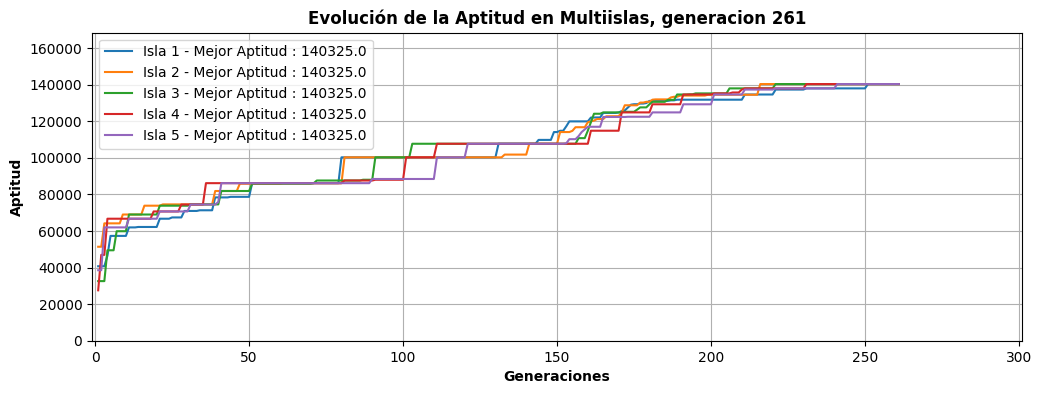

In [24]:
cant_islas = 5
generaciones_migracion = 10
individuos_migrantes = 5
cant_pobladores_por_isla = 200
generaciones=300

aptitudes = [{"max": [], "min": [], "media": []} for _ in range(cant_islas)]
i_graph = []

poblaciones = [generar_poblacion(colores, gramajes, valores_iniciales[0], valores_iniciales[1], produccion_gramaje_hora, cant_pobladores_por_isla)
for _ in range(cant_islas)]

resumen_islas = {f"Isla_{i+1}": [] for i in range(cant_islas)}

for i in range(1, generaciones + 1):
    nuevas_poblaciones = []

    for isla in range(cant_islas):

        poblacion = poblaciones[isla]
        matriz_con_aptitud = funcion_aptitud(poblacion, precio_color, precio_gramaje, costo_produccion_tonelada, colores, costo_cambio_color, valores_iniciales[2], pedido_clientes)
        matriz_con_aptitud = matriz_con_aptitud.sort_values(by="APTITUD", ascending = False).reset_index(drop=True)

        poblacion_hijos = tournament(matriz_con_aptitud["POBLACION"])
        #poblacion_hijos = aleatorio_monogamico(matriz_con_aptitud["POBLACION"])
        mutacion_inversion_simple(poblacion_hijos, 0.2)
        matriz_con_aptitud_hijos = funcion_aptitud(poblacion_hijos, precio_color, precio_gramaje, costo_produccion_tonelada, colores, costo_cambio_color, valores_iniciales[2], pedido_clientes)

        matriz_mixed = pd.concat([matriz_con_aptitud, matriz_con_aptitud_hijos], ignore_index=True)
        matriz_final = matriz_mixed.sort_values(by="APTITUD", ascending = False).reset_index(drop=True)

        poblaciones[isla] = matriz_final["POBLACION"][0:int(len(matriz_final)/2)]

        resumen_islas[isla] = matriz_final[0:int(len(matriz_final)/2)]

        aptitudes[isla]["media"].append(matriz_final["APTITUD"].mean())
        aptitudes[isla]["max"].append(matriz_final["APTITUD"].iloc[0])
        aptitudes[isla]["min"].append(matriz_final["APTITUD"].iloc[-1])

        resumen_islas[f"Isla_{isla+1}"].append(matriz_final)

    if i % generaciones_migracion == 0:  # Migración cada n generaciones
        for isla in range(cant_islas):
            next_isla = (isla + 1) % cant_islas
            migrantes = poblaciones[isla][0:individuos_migrantes]
            poblaciones[next_isla] = pd.concat([poblaciones[next_isla], migrantes]).reset_index(drop=True)

    i_graph.append(i)

    if i > 10 and all(
        np.mean(np.diff(aptitudes[isla]["max"][-12:])) < 0.000001
        for isla in range(cant_islas)
    ):
        break

    grafica_multiislas(i_graph, aptitudes, generaciones)

In [25]:
print("Pedido final: ", np.array(pedido_clientes) )

resumen_islas['Isla_1'][-1]['PRODUCCION FINAL'][0]

Pedido final:  [250 250 250 250 250 250 250 250 250]


['Papel Negro 80 : 250.0',
 'Papel Blanco 80 : 150.0',
 'Papel Gris 80 : 200.0',
 'Papel Negro 120 : 270.0',
 'Papel Blanco 120 : 270.0',
 'Papel Gris 120 : 270.0',
 'Papel Negro 150 : 280.0',
 'Papel Blanco 150 : 240.0',
 'Papel Gris 150 : 280.0']

In [26]:
print("Pedido en periodo: ", np.array(pedido_clientes) * np.array(valores_iniciales[2] )/ 100 )
resumen_islas['Isla_2'][-1]['PRODUCCION EN PERIODO'][0]

Pedido en periodo:  [ 87.5 100.  125.  112.5  50.   87.5 100.  112.5 125. ]


['Papel Negro 80 : 100.0',
 'Papel Blanco 80 : 100.0',
 'Papel Gris 80 : 150.0',
 'Papel Negro 120 : 135.0',
 'Papel Blanco 120 : 45.0',
 'Papel Gris 120 : 135.0',
 'Papel Negro 150 : 160.0',
 'Papel Blanco 150 : 120.0',
 'Papel Gris 150 : 160.0']

In [27]:
resumen_islas['Isla_5'][-1]['POBLACION'][0]

array([[50., 40., 40., 40., 40., 40., 50., 50., 40., 40., 50., 45., 40.,
        45., 40., 45., 50., 45., 40., 50., 50., 45., 40., 40., 45., 45.,
        45., 45., 50., 40., 40., 45., 50., 45., 45., 50., 40., 45., 45.,
        40., 40., 45., 50., 40., 40., 45., 45., 45., 50., 40.],
       [ 0.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  1.,  2.,
         1.,  2.,  1.,  0.,  1.,  2.,  0.,  0.,  1.,  2.,  2.,  1.,  1.,
         1.,  1.,  0.,  2.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,
         2.,  2.,  1.,  0.,  2.,  2.,  1.,  1.,  1.,  0.,  2.],
       [ 2.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.]])